# CUNY MSDS DATA618 - Quantative Finance

## Week 10 : Brain Stumper 6 
---------------------
1. Source a year’s data leading up to the peak shown for each of the indices and run your Kalman filter routine to test its limits as a predictive tool of future market behavior.

### Definitions

__Kalman Filter:__ The Kalman Filter, also known as 'Linear Quadratic Estimation (LQE)', is an algorithm that uses a series of measurements observed over time, including noise and inaccuracies, to produce estimates of unknown variables.

We'll import the libraries that we will use:

In [84]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import datetime
from pandas_datareader import data as pdr

import matplotlib.pyplot as plt
%matplotlib inline

import pylab as pl

Below we will load stock data from 'Nasdaq'. We will use the date range "2006-10-31 to 2007-10-31" to apply the Kalman Filter, and "2007-10-25 to 2007-11-16" as the data to reference for our predictions.

In [85]:
start = datetime.datetime(2006, 10, 31)
end = datetime.datetime(2007, 10, 31)

start2 = datetime.datetime(2007, 10, 25)
end2 = datetime.datetime(2007, 11, 16)

ticker = ['^NDX']

data = pdr.get_data_yahoo(ticker, start, end)['Close']
data2 = pdr.get_data_yahoo(ticker, start2, end2)['Close']

Here we will apply a fairly simple Kalman Filter to our first data, which has been loaded from the 'pykalman' package. We define a few parameters in order to fine-tune our filter.

Text(0.5, 0, 'Days')

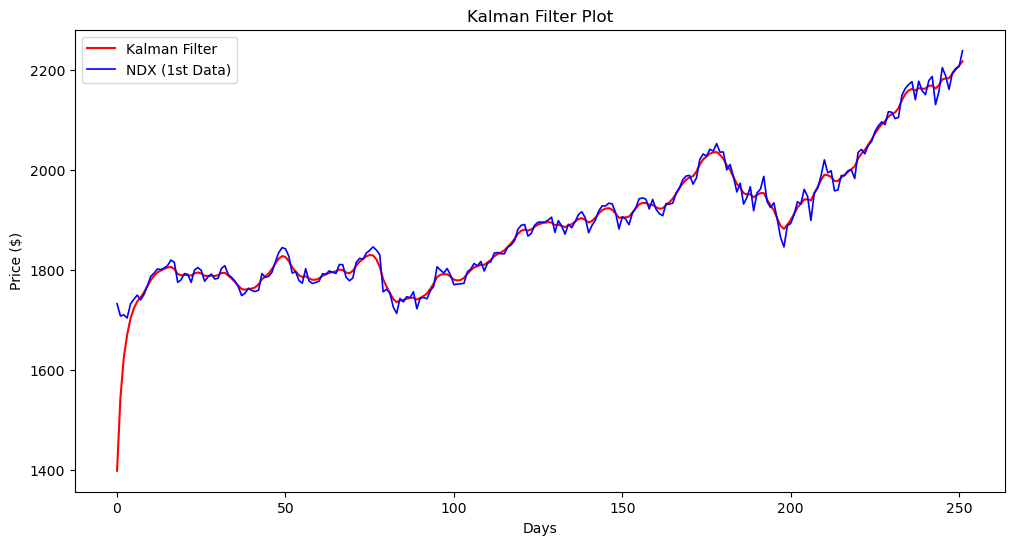

In [86]:
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance = 0.5,
                  transition_covariance = 0.2,
                  n_dim_obs=1)
mean, cov = kf.smooth(data['^NDX'].values)
#mean, std = mean.squeeze(), np.std(cov.squeeze())
plt.figure(figsize=(12,6))
plt.plot(mean, 'red', lw=1.5, label='Kalman Filter')
plt.plot(data['^NDX'].values, 'blue', lw=1.2, label='NDX (1st Data)')
plt.legend()
plt.title("Kalman Filter Plot")
plt.ylabel("Price ($)")
plt.xlabel("Days")

Now, we will use the filter with the second data in order to predict future values and make a quick comparison. 

In [87]:
predict = kf.em(data['^NDX'].values).smooth(data2['^NDX'].values)[0]
predict = pd.DataFrame(predict)

As we can observe below, the predictions seem to be very close to the actual values from the second data.

In [88]:
data2['Predictions'] = predict.values
data2

Symbols,^NDX,Predictions
Date,,
2007-10-25,2161.520020,1399.599255
2007-10-26,2194.590088,1816.267801
2007-10-29,2203.419922,2020.033037
2007-10-30,2207.610107,2120.596118
2007-10-31,2238.979980,2172.191514
2007-11-01,2197.070068,2186.201270
2007-11-02,2213.860107,2194.094538
2007-11-05,2200.479980,2190.864605
2007-11-06,2223.969971,2182.223558


Lastly, below we have created a plot of the Kalman Filter and Kalman Smooth from the 'pykalman' package, against our second data. We can observe how both the Filter and the Smooth closely estimate the values of the data set, but there is a dip in the index that may not have been estimated perfectly. 

This could represent a missed opportunity as we did not get accurate estimates.

In [89]:
smoothed_state_estimates = kf.smooth(data2['^NDX'])[0]
filtered_state_estimates = kf.filter(data2['^NDX'])[0]

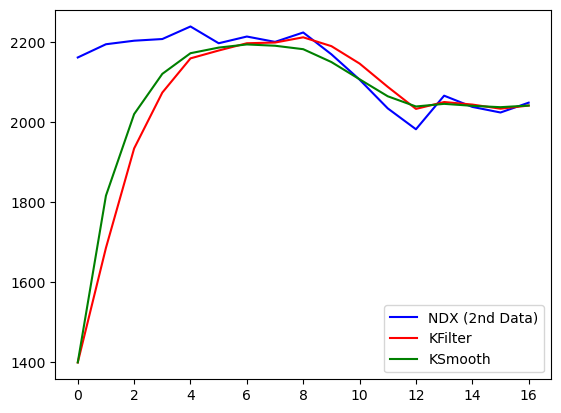

In [97]:
pl.figure()
lines_true = pl.plot(data2['^NDX'].values, color='b')
lines_filt = pl.plot(filtered_state_estimates, color='r')
lines_smooth = pl.plot(smoothed_state_estimates, color='g')
pl.legend((lines_true[0], lines_filt[0], lines_smooth[0]),
          ('NDX (2nd Data)', 'KFilter', 'KSmooth'),
          loc='lower right'
)
pl.show()

Below we will continue with the analysis for the Dow Jones and S&P 500 indices.

In [101]:
dj_start = datetime.datetime(2006, 10, 9)
dj_end = datetime.datetime(2007, 10, 9)

dj_start2 = datetime.datetime(2007, 10, 3)
dj_end2 = datetime.datetime(2007, 10, 25)

dj_ticker = ['^DJI']

dj_data = pdr.get_data_yahoo(dj_ticker, dj_start, dj_end)['Close']
dj_data2 = pdr.get_data_yahoo(dj_ticker, dj_start2, dj_end2)['Close']

Text(0.5, 0, 'Days')

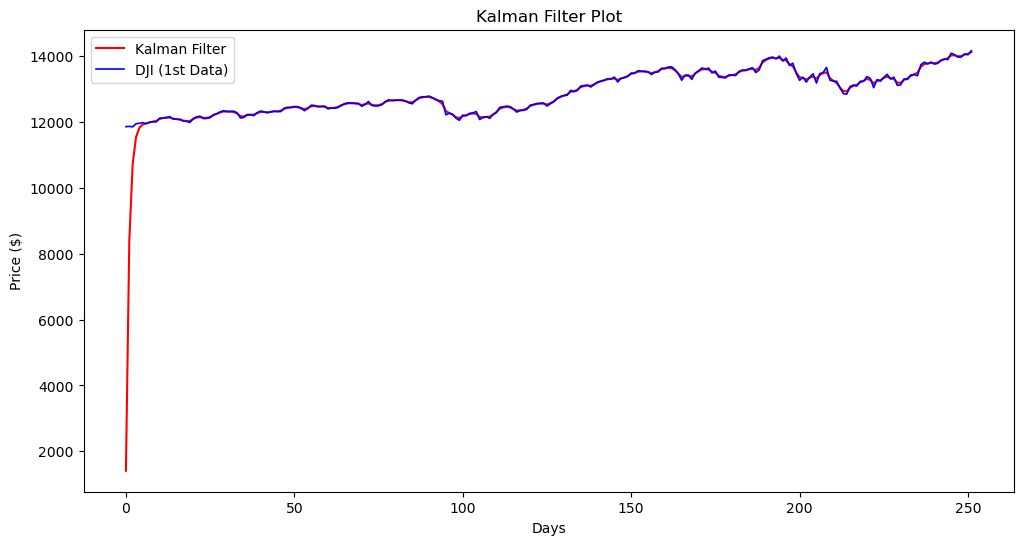

In [102]:
mean, cov = kf.smooth(dj_data['^DJI'].values)
#mean, std = mean.squeeze(), np.std(cov.squeeze())
plt.figure(figsize=(12,6))
plt.plot(mean, 'red', lw=1.5, label='Kalman Filter')
plt.plot(dj_data['^DJI'].values, 'blue', lw=1.2, label='DJI (1st Data)')
plt.legend()
plt.title("Kalman Filter Plot")
plt.ylabel("Price ($)")
plt.xlabel("Days")

In [103]:
dj_predict = kf.em(dj_data['^DJI'].values).smooth(dj_data2['^DJI'].values)[0]
dj_predict = pd.DataFrame(dj_predict)

In [104]:
dj_data2['Predictions'] = dj_predict.values
dj_data2

Symbols,^DJI,Predictions
Date,,
2007-10-03,13968.049805,1408.582521
2007-10-04,13974.309570,7727.237641
2007-10-05,14066.009766,10904.670379
2007-10-08,14043.730469,12492.483189
2007-10-09,14164.530273,13300.280541
2007-10-10,14078.690430,13673.506203
2007-10-11,14015.120117,13842.992614
2007-10-12,14093.080078,13925.927953
2007-10-15,13984.799805,13924.813997


In [106]:
sp_start = datetime.datetime(2006, 10, 9)
sp_end = datetime.datetime(2007, 10, 9)

sp_start2 = datetime.datetime(2007, 10, 3)
sp_end2 = datetime.datetime(2007, 10, 25)

sp_ticker = ['^GSPC']

sp_data = pdr.get_data_yahoo(sp_ticker, sp_start, sp_end)['Close']
sp_data2 = pdr.get_data_yahoo(sp_ticker, sp_start2, sp_end2)['Close']

Text(0.5, 0, 'Days')

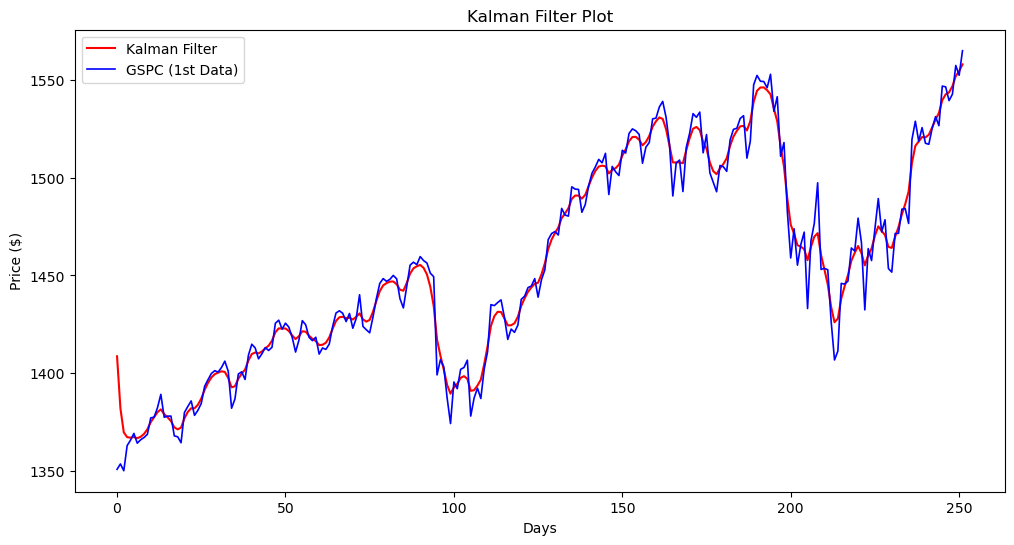

In [107]:
mean, cov = kf.smooth(sp_data['^GSPC'].values)
#mean, std = mean.squeeze(), np.std(cov.squeeze())
plt.figure(figsize=(12,6))
plt.plot(mean, 'red', lw=1.5, label='Kalman Filter')
plt.plot(sp_data['^GSPC'].values, 'blue', lw=1.2, label='GSPC (1st Data)')
plt.legend()
plt.title("Kalman Filter Plot")
plt.ylabel("Price ($)")
plt.xlabel("Days")

In [108]:
sp_predict = kf.em(sp_data['^GSPC'].values).smooth(sp_data2['^GSPC'].values)[0]
sp_predict = pd.DataFrame(sp_predict)

In [109]:
sp_data2['Predictions'] = sp_predict.values
sp_data2

Symbols,^GSPC,Predictions
Date,,
2007-10-03,1539.589966,1408.613774
2007-10-04,1542.839966,1501.181319
2007-10-05,1557.589966,1538.438533
2007-10-08,1552.579956,1550.268323
2007-10-09,1565.150024,1559.028949
2007-10-10,1562.469971,1559.662601
2007-10-11,1554.410034,1556.568898
2007-10-12,1561.800049,1556.341527
2007-10-15,1548.709961,1548.866856


In the predictions of both the Dow Jones and the S&P 500 we can observe how the estimates keep increasing past the peak date of October 9, 2007. This was also the case in the predictions for Nasdaq, the estimates kept increasing past the peak and if we were to invest based on these estimates, we would be overvaluing the stock price.